In [ ]:
from pathlib import Path
import json
import itertools
import sys, os
import datetime as dt
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
PROJPATH = Path().resolve().parent
sys.path.append((PROJPATH / 'scripts').as_posix())
import riverice_util as ru

In [ ]:
username = os.environ['USER']

In [ ]:
prefix = "DD25"       # set to TDD for Thawing Degree Days

tdd_anomalycorr = f"/Users/{username}/Projects/2023_Riverice/data/breakupdata/derived/{prefix}_anomaly_correlations.csv"
breakup_stats = f"/Users/{username}/Projects/2023_Riverice/data/breakupdata/derived/breakupdate_mean_std_1983_2022.csv"
breakupdata = Path(f'/Users/{username}/Projects/2023_Riverice/data/breakupdata/')
stationfolder = Path(f"/Users/{username}/Projects/2023_Riverice/data/weatherstations/ACIS/{prefix}/dd_cumul_bystation")
outfolder = Path(f"/Users/{username}/Projects/2023_Riverice/data/working")

Rename station names

In [ ]:
anomalycorrDF = pd.read_csv(tdd_anomalycorr, header=3, index_col=0)
anomalycorrDF

,date,stationname,location,r2,r,p,DateStamp
0,04-01,ALYESKA,Koyukuk River at Bettles,0.006324,0.079526,0.635067,2000-04-01
1,04-01,ANCHORAGE_MERRILL_FIELD,Koyukuk River at Bettles,0.000352,-0.018763,0.929067,2000-04-01
2,04-01,ANCHORAGE_TED_STEVENS_INTL_AP,Koyukuk River at Bettles,0.004262,0.065284,0.685092,2000-04-01
3,04-01,AUKE_BAY,Koyukuk River at Bettles,0.005658,0.075220,0.644580,2000-04-01
4,04-01,BARROW_AP,Koyukuk River at Bettles,0.009983,0.099915,0.534245,2000-04-01
...,...,...,...,...,...,...,...
98600,06-04,SITKA_AP,Gakona River at Gakona,0.115278,-0.339527,0.049471,2000-06-04
98601,06-04,SKAGWAY_AP,Gakona River at Gakona,0.065209,-0.255361,0.208012,2000-06-04
98602,06-04,TALKEETNA_AP,Gakona River at Gakona,0.324413,-0.569573,0.000438,2000-06-04
98603,06-04,TANANA_AP,Gakona River at Gakona,0.093829,-0.306316,0.082962,2000-06-04


In [ ]:
sorted(anomalycorrDF.location.unique())

['Buckland River at Buckland',
 'Chena River at Fairbanks',
 'Chisana River at Northway',
 'Gakona River at Gakona',
 'Gulkana River nr Gakona',
 'Kobuk River at Ambler',
 'Kobuk River at Kobuk',
 'Kobuk River at Shungnak',
 'Koyukuk River at Allakaket',
 'Koyukuk River at Bettles',
 'Koyukuk River at Hughes',
 'Kuskokwim River at Akiak',
 'Kuskokwim River at Aniak',
 'Kuskokwim River at Bethel',
 'Kuskokwim River at Crooked Creek',
 'Kuskokwim River at Kalskag',
 'Kuskokwim River at McGrath',
 'Kuskokwim River at Nikolai',
 'Kuskokwim River at Red Devil',
 'Kuskokwim River at Sleetmute',
 'Kuskokwim River at Stony River',
 'Kuskokwim River at Tuluksak',
 'Susitna River at Sunshine',
 'Tanana River at Nenana',
 'Tanana River nr Manley Hot Springs',
 'Yentna River at Lake Creek',
 'Yukon River at Alakanuk',
 'Yukon River at Anvik',
 'Yukon River at Circle',
 'Yukon River at Dawson',
 'Yukon River at Eagle',
 'Yukon River at Fort Yukon',
 'Yukon River at Galena',
 'Yukon River at Holy Cr

### Prototyping: Eagle, Northway

In [ ]:
location = 'Chisana River at Northway'
# location = 'Yukon River at Russian Mission'
# location = 'Yukon River at Eagle'

In [ ]:
eagleDF = anomalycorrDF[anomalycorrDF.location == location]
eagleDF['DateStamp'] = pd.to_datetime(eagleDF['DateStamp'], format='%Y-%m-%d')
eagleDF

/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_32154/121066999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eagleDF['DateStamp'] = pd.to_datetime(eagleDF['DateStamp'], format='%Y-%m-%d')


,date,stationname,location,r2,r,p,DateStamp
1369,04-01,ALYESKA,Chisana River at Northway,0.378912,-0.615558,0.000489,2000-04-01
1370,04-01,ANCHORAGE_MERRILL_FIELD,Chisana River at Northway,0.430678,-0.656261,0.002277,2000-04-01
1371,04-01,ANCHORAGE_TED_STEVENS_INTL_AP,Chisana River at Northway,0.185092,-0.430224,0.013980,2000-04-01
1372,04-01,AUKE_BAY,Chisana River at Northway,0.090953,-0.301584,0.099190,2000-04-01
1373,04-01,BARROW_AP,Chisana River at Northway,0.197432,-0.444333,0.010841,2000-04-01
...,...,...,...,...,...,...,...
98489,06-04,SITKA_AP,Chisana River at Northway,0.306668,-0.553776,0.001009,2000-06-04
98490,06-04,SKAGWAY_AP,Chisana River at Northway,0.541493,-0.735862,0.000042,2000-06-04
98491,06-04,TALKEETNA_AP,Chisana River at Northway,0.456926,-0.675963,0.000022,2000-06-04
98492,06-04,TANANA_AP,Chisana River at Northway,0.371595,-0.609586,0.000213,2000-06-04


In [ ]:
grouped = eagleDF.drop(
        columns=['date', 'location', 'r', 'p']).groupby(
                ['stationname', pd.Grouper(key='DateStamp', freq='15D')]).mean().reset_index()

In [ ]:
max4 = (
    grouped
        .groupby(['DateStamp'])
        .apply(lambda group: group.nlargest(4, columns='r2'))
).reset_index(drop=True)

In [ ]:
max4

,stationname,DateStamp,r2
0,CHICKEN,2000-04-01,0.702190
1,NENANA_MUN_AP,2000-04-01,0.609903
2,ANCHORAGE_MERRILL_FIELD,2000-04-01,0.493890
3,NORTHWAY_AP,2000-04-01,0.484921
4,CHICKEN,2000-04-16,0.804733
5,NENANA_MUN_AP,2000-04-16,0.727264
6,GULKANA_AP,2000-04-16,0.723531
7,EAGLE,2000-04-16,0.684215
8,CHICKEN,2000-05-01,0.749887
9,NENANA_MUN_AP,2000-05-01,0.744160


In [ ]:
datestamps = ['2000-04-01', '2000-04-16',
       '2000-05-01', '2000-05-16']

In [ ]:
sites = set()
maxN = 10
for datestamp in datestamps:
    for station in max4[max4.DateStamp== datestamp].stationname.to_list():
        if station == 'COLLEGE_OBSERVATORY':
            continue
        if station not in sites:
            break
    print(station)
    sites.add(station)
    if len(sites) == maxN:
        break 

CHICKEN
NENANA_MUN_AP
GULKANA_AP
ANCHORAGE_MERRILL_FIELD


In [ ]:
sites

{'ANCHORAGE_MERRILL_FIELD', 'CHICKEN', 'GULKANA_AP', 'NENANA_MUN_AP'}

In [ ]:
def restore_stationnames(stationlst):
    return [
        item.replace('AP', 'AIRPORT')           # .replace('INTL', 'INTERNATIONAL')
        for item in stationlst
        ]

sites1 = list(sites)
# sites1 = restore_stationnames(sites1)
sites2 = ['FAIRBANKS_INTL_AP', 'EAGLE', 'BIG_DELTA_AP', 'NENANA_MUN_AP']
sites2 = restore_stationnames(sites2)
sites1, sites2

(['CHICKEN', 'ANCHORAGE_MERRILL_FIELD', 'GULKANA_AP', 'NENANA_MUN_AP'],
 ['FAIRBANKS_INTL_AIRPORT',
  'EAGLE',
  'BIG_DELTA_AIRPORT',
  'NENANA_MUN_AIRPORT'])

In [ ]:
stationsdfs = {}
stationfolder = Path(f"/Users/{username}/Projects/2023_Riverice/data/weatherstations/ACIS/{prefix}/dd_cumul_bystation")
for station in sites1:
    try:
        stationsdfs[station] = pd.read_csv(stationfolder / f"{station}_yearly_{prefix}_cumul.csv", skiprows=4, index_col=0)
    except FileNotFoundError:
        stationsdfs[station] = pd.read_csv(stationfolder / f"{restore_stationnames([station])[0]}_yearly_{prefix}_cumul.csv", skiprows=4, index_col=0)

In [ ]:
stationsdfs.keys()

dict_keys(['CHICKEN', 'ANCHORAGE_MERRILL_FIELD', 'GULKANA_AP', 'NENANA_MUN_AP'])

In [ ]:
# sites2 = ['FAIRBANKS_INTL_AP', 'EAGLE', 'BIG_DELTAa_AP', 'NENANA_MUN_AP']
# stationsdfs = {}
# stationfolder = Path("/Users/christine/Projects/2023_Riverice/data/weatherstations/ACIS/TDD/tdd_cumul_bystation")
# for station in sites2:
#     stationsdfs[station] = pd.read_csv(stationfolder / f"{station}_yearly_TDD_cumul.csv", skiprows=4, index_col=0)

In [ ]:
stationsdfs['FAIRBANKS_INTL_AP']

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
d_since_march1,,,,,,,,,,,,,,,,,,,,,
0,0.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,6.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,1966.0,2059.0,1707.0,2124.5,1907.0,1627.5,1850.0,2134.0,2224.5,1960.5,...,1703.0,2016.5,2259.0,2371.0,2072.0,1863.5,2409.0,2055.5,2108.5,1915.5
118,2004.0,2084.5,1752.0,2169.5,1943.5,1663.0,1892.0,2171.0,2260.5,1995.0,...,1752.5,2045.5,2290.0,2405.5,2113.5,1902.5,2449.0,2090.5,2146.5,1957.0
119,2036.0,2110.5,1797.0,2211.5,1982.5,1699.5,1938.0,2210.0,2300.0,2031.0,...,1800.0,2080.0,2324.5,2444.0,2155.0,1939.0,2495.5,2125.0,2183.0,1997.0


In [ ]:
mean_eagle = pd.concat(stationsdfs.values())
mean_eagle = mean_eagle.groupby(mean_eagle.index).mean()
mean_eagle

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,1988,1989,1990,1991,1992,1993,1994,1996,1997,1995
d_since_march1,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.0000,0.3750,0.000,0.2500,4.666667,1.750,0.250,0.0000,0.000,...,4.0,0.0,0.0,0.0,0.00,3.0,0.0,0.0,0.00,0.00
1,0.000000,0.0000,0.3750,0.000,1.1250,5.833333,3.625,0.250,0.0000,0.000,...,4.0,0.0,10.0,0.0,0.00,5.0,0.0,0.0,0.00,2.50
2,0.000000,0.0000,2.5000,0.000,1.1250,14.166667,5.750,1.000,0.0000,0.000,...,11.5,0.0,24.5,0.0,0.00,5.0,0.0,0.0,0.00,7.00
3,0.000000,0.0000,5.1250,0.000,1.1250,16.833333,7.250,1.500,0.0000,0.000,...,11.5,0.0,28.0,0.0,0.00,5.0,0.0,0.0,0.00,10.50
4,0.000000,0.0000,5.8750,2.875,1.1250,19.166667,7.500,3.250,0.3750,0.000,...,11.5,0.0,28.0,0.0,0.00,5.0,0.0,3.5,0.00,10.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,1832.033333,1708.2525,1673.9275,1734.045,1618.0725,1763.093333,2045.020,2005.820,1669.3375,1835.125,...,1687.5,1687.5,1943.0,1760.5,1541.27,1893.5,1758.5,1621.0,1592.68,2052.08
118,1867.200000,1742.1275,1710.3025,1767.795,1648.8225,1791.260000,2085.145,2041.195,1701.7125,1867.750,...,1713.5,1719.0,1982.0,1800.0,1574.77,1923.0,1783.5,1646.5,1630.68,2082.58
119,1903.700000,1775.6275,1745.0525,1802.045,1680.4475,1821.260000,2123.770,2078.195,1733.8375,1901.375,...,1741.0,1751.5,2020.5,1836.5,1613.77,1953.5,1809.5,1673.0,1670.18,2116.58


In [ ]:
outpath = Path(f"/Users/{username}/Projects/2023_Riverice/data/weatherstations/ACIS_combined_DD")
whichsites = ', '.join(sites)
with open(outpath / f"{prefix}_combined_{location.replace(' ', '_')}.csv", 'w') as dst:
        dst.write(f"# Cumulative {prefix} averaged for {location}\n")
        dst.write(f"# Sites: {whichsites}\n")
        dst.write("#\n")
        mean_eagle.to_csv(dst, float_format='%.2f')

### All locations

In [ ]:
locations = list(set(anomalycorrDF.location.to_list()))
datestamps = ['2000-04-01', '2000-04-16',
       '2000-05-01', '2000-05-16']
maxN = 10
stationfolder = Path(f"/Users/christine/Projects/2023_Riverice/data/weatherstations/ACIS/{prefix}/dd_cumul_bystation")
outpath = Path("/Users/christine/Projects/2023_Riverice/data/weatherstations/ACIS_combined_DD")


for location in locations:
    print(f"Working on {location}")
    locDF = anomalycorrDF[anomalycorrDF.location == location]
    locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
    grouped = locDF.drop(
        columns=['date', 'location', 'r', 'p']).groupby(
                ['stationname', pd.Grouper(key='DateStamp', freq='15D')]).mean().reset_index()
    max4 = (grouped
                .groupby(['DateStamp'])
                .apply(lambda group: group.nlargest(4, columns='r2'))
        ).reset_index(drop=True)
    sites = set()
    for datestamp in datestamps:
        for station in max4[max4.DateStamp== datestamp].stationname.to_list():
            if station == 'COLLEGE_OBSERVATORY':
                continue
            if station not in sites:
                break
        sites.add(station)
        if len(sites) == maxN:
            break 
    sites = list(sites)
    stationsdfs = {}
    for station in sites:
        try: 
            stationsdfs[station] = pd.read_csv(stationfolder / f"{station}_yearly_{prefix}_cumul.csv", skiprows=4, index_col=0)
        except FileNotFoundError:
            stationsdfs[station] = pd.read_csv(stationfolder / f"{station.replace('AP', 'AIRPORT')}_yearly_{prefix}_cumul.csv", skiprows=4, index_col=0)
    mean_loc = pd.concat(stationsdfs.values())
    mean_loc = mean_loc.groupby(mean_loc.index).mean()
    whichsites = ', '.join(sites)
    with open(outpath / f"{prefix}_combined_{location.replace(' ', '_')}.csv", 'w') as dst:
            dst.write(f"# Cumulative {prefix} averaged for {location}\n")
            dst.write(f"# Sites: {whichsites}\n")
            dst.write("#\n")
            mean_loc.to_csv(dst, float_format='%.2f')


Working on Kuskokwim River at Nikolai
Working on Yukon River at Anvik
Working on Yukon River at Eagle
Working on Yukon River at Galena
Working on Kobuk River at Ambler


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 

Working on Yukon River at Ruby
Working on Gakona River at Gakona
Working on Yukon River at Circle
Working on Yukon River at Marshall
Working on Kuskokwim River at Crooked Creek


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 

Working on Koyukuk River at Allakaket
Working on Kobuk River at Shungnak
Working on Yukon River at Alakanuk
Working on Kuskokwim River at McGrath
Working on Gulkana River nr Gakona


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 

Working on Tanana River at Nenana
Working on Chisana River at Northway
Working on Kuskokwim River at Red Devil
Working on Yukon River at Kaltag
Working on Chena River at Fairbanks


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 

Working on Yukon River at Tanana
Working on Yukon River at Russian Mission
Working on Tanana River nr Manley Hot Springs
Working on Kuskokwim River at Stony River
Working on Yukon River at Dawson


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 

Working on Yukon River at Mountain Village
Working on Yukon River at Fort Yukon
Working on Kuskokwim River at Akiak
Working on Koyukuk River at Hughes
Working on Kuskokwim River at Tuluksak


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 

Working on Kuskokwim River at Aniak
Working on Yukon River nr Emmonak
Working on Kobuk River at Kobuk
Working on Koyukuk River at Bettles
Working on Susitna River at Sunshine


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 

Working on Kuskokwim River at Bethel
Working on Kuskokwim River at Kalskag
Working on Buckland River at Buckland
Working on Kuskokwim River at Sleetmute
Working on Yentna River at Lake Creek
Working on Yukon River at Holy Cross


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locDF['DateStamp'] = pd.to_datetime(locDF['DateStamp'], format='%Y-%m-%d')
/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_5100/1635248383.py:12: SettingWithCopyWarning: 

In [ ]:
restore_stationnames("BigDelta_AP")

['B', 'i', 'g', 'D', 'e', 'l', 't', 'a', '_', 'A', 'P']

## Likelihoods for Eagle , etc. 

In [ ]:
location = "Yukon River at Russian Mission"
try:
    location_short = location.split('nr')[1].strip()
except IndexError: 
    location_short = location.split('at')[1].strip()
location_short

'Russian Mission'

In [ ]:
def datestr2dayssince(datestr, since='0301'):
    thedate = dt.datetime.strptime(datestr, '%Y-%m-%d').date()
    since_mth = int(since[:2])
    since_day = int(since[3:])
    since_date = dt.date(thedate.year, since_mth, since_day)
    return (thedate - since_date).days
def dayssince2date(days, year=2000, since='0301'):
    since_date = dt.datetime.strptime(f"{year}{since}", "%Y%m%d").date()
    return (since_date + dt.timedelta(days=days)).strftime("%m-%d")

In [ ]:
breakuppth = breakupdata / "derived/breakupDate_cleaned.csv"
breakup = pd.read_csv(breakuppth, header=3, index_col=0)
breakup = breakup[breakup.siteID == location].sort_values(by='year').reset_index(drop=True)
breakup['days_since_march1'] = breakup.apply(lambda row: datestr2dayssince(row.breakup), axis=1)
breakup

,id,siteID,year,breakup,days_since_march1
0,6044,Yukon River at Russian Mission,1981,1981-05-09,69
1,6046,Yukon River at Russian Mission,1984,1984-05-20,80
2,6047,Yukon River at Russian Mission,1985,1985-05-26,86
3,6048,Yukon River at Russian Mission,1986,1986-05-23,83
4,6049,Yukon River at Russian Mission,1987,1987-05-17,77
5,6050,Yukon River at Russian Mission,1988,1988-05-12,72
6,6051,Yukon River at Russian Mission,1989,1989-05-14,74
7,6052,Yukon River at Russian Mission,1990,1990-05-18,78
8,6053,Yukon River at Russian Mission,1991,1991-05-10,70
9,6054,Yukon River at Russian Mission,1992,1992-05-24,84


In [ ]:
breakup.dtypes

id                    int64
siteID               object
year                  int64
breakup              object
days_since_march1     int64
dtype: object

In [ ]:
breakup_avg_model = linear_model.LinearRegression() 
breakup_avg_model.fit(breakup[['year']], breakup[['days_since_march1']])

LinearRegression()

In [ ]:
mu_0 = breakup_avg_model.predict([[2023]]).item()

start = 0 
xs = np.arange(0, 101)

/Users/christine/miniconda3/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
sigma_0 = mean_squared_error([breakup_avg_model.predict([[yr]]).item() for yr in breakup['year'].tolist()],
                   breakup['days_since_march1'].tolist(), squared=False)

/Users/christine/miniconda3/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/christine/miniconda3/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/christine/miniconda3/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/christine/miniconda3/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/christine/miniconda3/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fit

In [ ]:
import scipy.stats as stats
import math

In [ ]:
sns.set_style('whitegrid')

(0.0, 70.0)

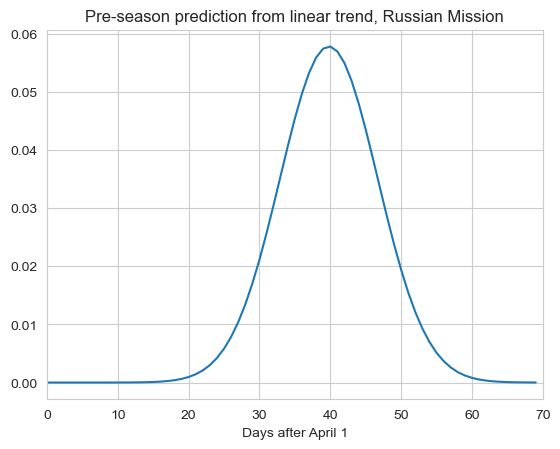

In [ ]:
plt.plot(xs-31, stats.norm.pdf(xs, mu_0, sigma_0))
plt.title(f"Pre-season prediction from linear trend, {location_short}")
plt.xlabel("Days after April 1")
plt.xlim((0,70))

In [ ]:
breakup[breakup['days_since_march1']==65].year.to_list()

[2019]

In [ ]:
possible_days = sorted(list(set(breakup['days_since_march1'])))
records = []

for days_after_march_1 in range(30, 80):
    days_from_now_possible = [item-days_after_march_1 for item in possible_days]
    if len(days_from_now_possible) != 0:
        for days in days_from_now_possible:
            days_possible = days + days_after_march_1
            years = breakup[breakup['days_since_march1']==days_possible].year.astype(str).to_list()
            if len(years) == 0: 
                print("This shouldnt happen")
                continue
            print(days_after_march_1, days_possible, mean_eagle[years].mean(axis=1)[days_after_march_1])
            records.append(
                {'forecast_day_past_march1': days_after_march_1,
                    'days_from_then': days,
                    'mean_DD': mean_eagle[years].mean(axis=1)[days_after_march_1]}
            )
likelihoodDF = pd.DataFrame.from_records(records)
likelihoodDF

30 55 125.875
30 62 38.25
30 63 25.25
30 65 211.375
30 66 10.0
30 67 24.5
30 69 75.04166666666667
30 70 29.583333333333332
30 72 53.0
30 73 103.75
30 74 32.625
30 75 30.875
30 76 44.333333333333336
30 77 50.625
30 78 59.520833333333336
30 79 40.5
30 80 70.5
30 82 27.625
30 83 38.1875
30 84 74.25
30 86 26.5
30 88 25.125
31 55 138.75
31 62 39.25
31 63 25.25
31 65 222.375
31 66 18.375
31 67 30.0
31 69 81.33333333333333
31 70 30.041666666666668
31 72 57.5
31 73 109.5
31 74 34.375
31 75 35.25
31 76 44.333333333333336
31 77 50.625
31 78 63.168749999999996
31 79 43.25
31 80 78.75
31 82 30.875
31 83 38.3125
31 84 75.25
31 86 26.5
31 88 28.5
32 55 150.25
32 62 40.625
32 63 25.25
32 65 231.125
32 66 26.625
32 67 37.0
32 69 85.375
32 70 32.0
32 72 57.5
32 73 115.875
32 74 35.75
32 75 38.5625
32 76 44.5
32 77 51.0
32 78 67.04375
32 79 46.25
32 80 87.25
32 82 33.25
32 83 39.625
32 84 76.25
32 86 26.5
32 88 30.25
33 55 161.625
33 62 42.125
33 63 28.125
33 65 235.0
33 66 31.25
33 67 39.5
33 69 88.458

,forecast_day_past_march1,days_from_then,mean_DD
0,30,25,125.8750
1,30,32,38.2500
2,30,33,25.2500
3,30,35,211.3750
4,30,36,10.0000
...,...,...,...
1095,79,3,559.9075
1096,79,4,496.4600
1097,79,5,430.7000
1098,79,7,374.5000


In [ ]:
possible_days = sorted(list(set(breakup['days_since_march1'])))
records = []

for days_after_march_1 in range(10, 80):
    days_from_now_possible = [item-days_after_march_1 for item in possible_days]
    if len(days_from_now_possible) != 0:
        for days in days_from_now_possible:
            days_possible = days + days_after_march_1
            years = breakup[breakup['days_since_march1']==days_possible].year.astype(str).to_list()
            if len(years) == 0: 
                print("This shouldnt happen")
                continue
            for year in years:
                # print(year, days_after_march_1, mean_eagle[year][days_after_march_1])
                records.append({
                    'forecast_day_past_march1': days_after_march_1,
                    'year': year,
                    'days_from_then': days,
                    'mean_DD': mean_eagle[year][days_after_march_1]}
                )
likelihoodDF = pd.DataFrame.from_records(records)
likelihoodDF['day_absolute_since_march_1'] = likelihoodDF['forecast_day_past_march1'] + likelihoodDF['days_from_then']
likelihoodDF['forecastdate'] = likelihoodDF['forecast_day_past_march1'].apply(dayssince2date)
likelihoodDF

,forecast_day_past_march1,year,days_from_then,mean_DD,day_absolute_since_march_1,forecastdate
0,10,2016,45,14.750,55,03-11
1,10,2014,52,10.125,62,03-11
2,10,2004,53,12.750,63,03-11
3,10,2019,55,28.750,65,03-11
4,10,2017,56,0.000,66,03-11
...,...,...,...,...,...,...
2515,79,1986,4,372.000,83,05-19
2516,79,2001,4,620.920,83,05-19
2517,79,1992,5,430.700,84,05-19
2518,79,1985,7,374.500,86,05-19


In [ ]:
likelihoodDF[(likelihoodDF.forecast_day_past_march1==55) & (likelihoodDF['year']=='2022')]['mean_DD'].squeeze()

203.875

In [ ]:
mean_eagle['2000'][65]

395.125

In [ ]:
ru.dayssince2date(30, 2022)

datetime.date(2022, 3, 31)

34.04928458898467 6.489670848157403 38 9.323114503651018e-08 5.2109906712742755e-06 0.00043861686541246854 0.011967932940177686


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_32154/3084910155.py:40: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


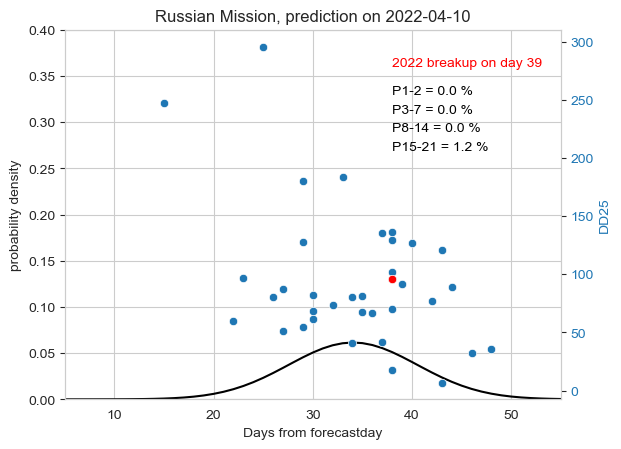

29.75404496559497 6.071926921828506 33 5.777365596406444e-07 3.110424521474042e-05 0.0021899985145987597 0.04322767363680377


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_32154/3084910155.py:40: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


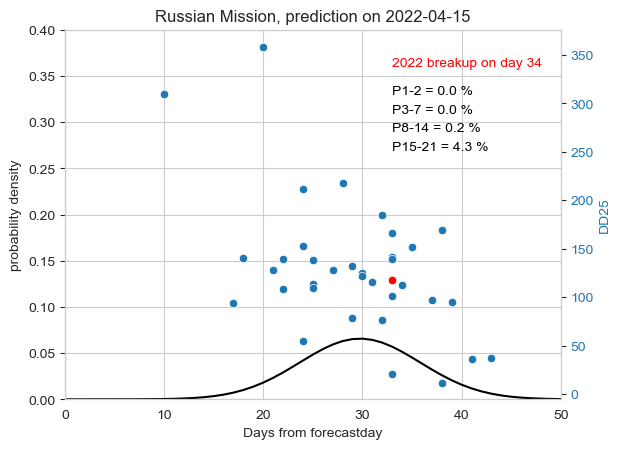

26.04336016414139 5.73424986102413 28 3.3379805121209365e-06 0.00016308791151011063 0.008851934802140627 0.11759370381317916


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_32154/3084910155.py:40: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


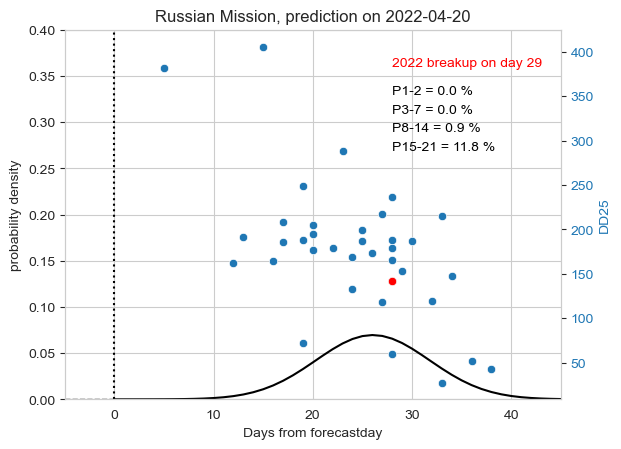

20.94214712960996 5.411896514928068 23 6.116414702979846e-05 0.002057900478383382 0.056993185089451934 0.33567511005159345


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_32154/3084910155.py:40: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


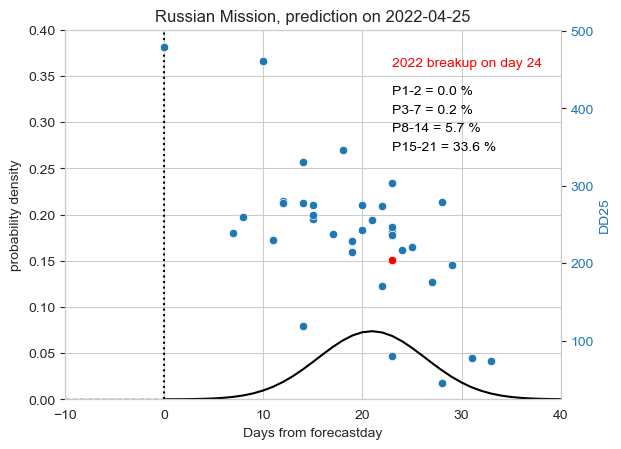

15.862183773764286 5.124441885360396 18 0.0009941304906684418 0.020092428131847917 0.23428676284308778 0.506274224429567


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_32154/3084910155.py:40: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


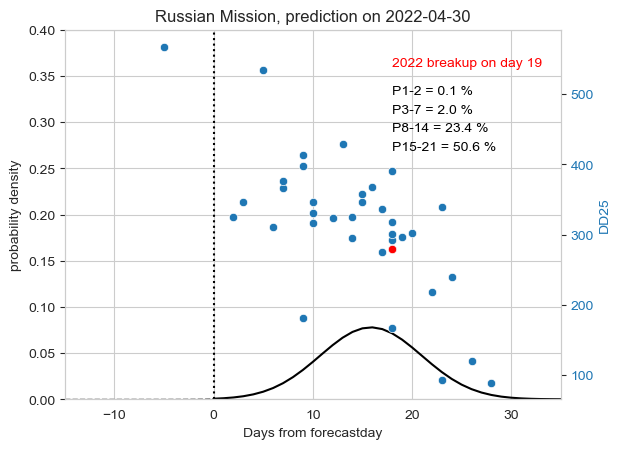

10.543390267741017 4.639241311270521 13 0.010480448070692018 0.1240475820222437 0.5301964582466467 0.31243754726726664


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_32154/3084910155.py:40: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


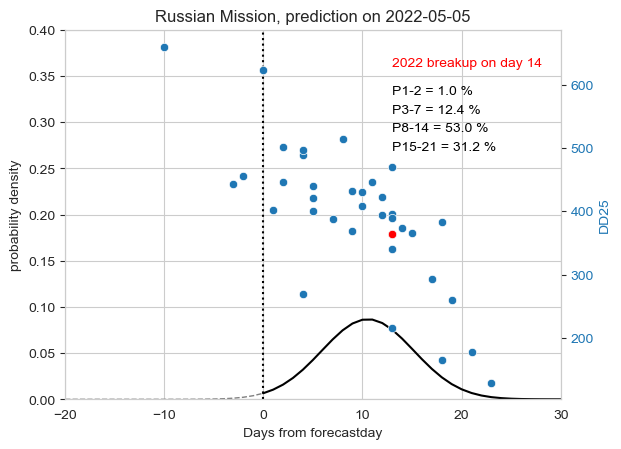

5.970394094922117 4.317455146893075 8 0.06493921671574787 0.3797299545003294 0.5128130099928166 0.0685051888473472


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_32154/3084910155.py:40: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


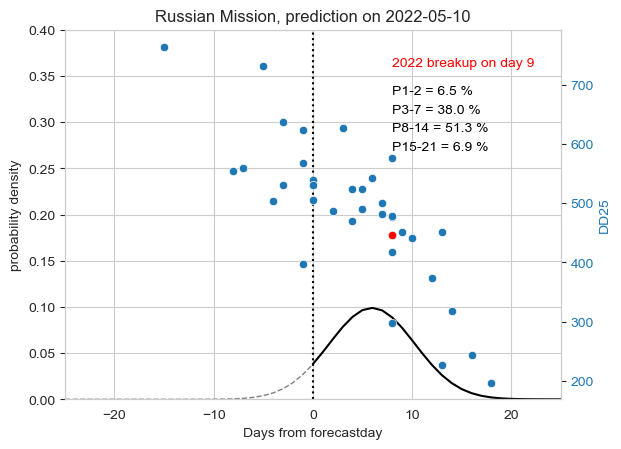

1.66322632909122 4.084538486226295 3 0.24046000947027651 0.6253952941511448 0.24102348935949175 0.0055588871952051725


/var/folders/39/6h0p929579n8vrp25cjkbz3h0000gn/T/ipykernel_32154/3084910155.py:40: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=None)


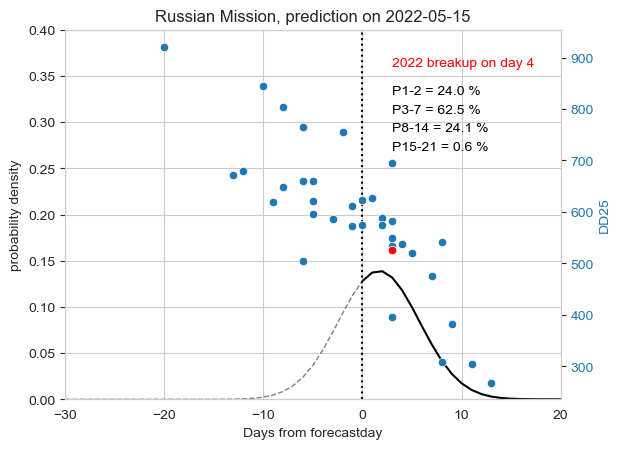

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

In [ ]:
xs = np.arange(-101, 101)
year = 2022

for ii in range (40, 90, 5):
    breakup_avg_model = linear_model.LinearRegression() 
    DF = likelihoodDF[likelihoodDF.forecast_day_past_march1==ii].copy()
    DDval = DF[DF['year']==str(year)]['mean_DD'].squeeze()
    breakup_avg_model.fit(DF[['mean_DD']].values, DF[['days_from_then']].values)
    mu_0 = breakup_avg_model.predict([[DDval]]).item()
    sigma_0 = mean_squared_error([breakup_avg_model.predict([[dd]]).item() for dd in DF['mean_DD'].tolist()],
                   DF['days_from_then'].tolist(), squared=False)

    # normalize on > 0 values
    pdf = stats.norm.pdf(xs, mu_0, sigma_0)/stats.norm.pdf(xs[101:], mu_0, sigma_0).sum()
    prob_12 = pdf[100:102].sum()
    prob_37 = pdf[102:107].sum()
    prob_wk2 = pdf[107:114].sum()
    prob_wk3 = pdf[114:121].sum()
    breakup_2022 = DF[DF.year==str(year)]['days_from_then'].squeeze()
    forecastdate = ru.dayssince2date(ii, year)
    print(mu_0, sigma_0, breakup_2022, prob_12, prob_37, prob_wk2, prob_wk3)
    fig, ax1 = plt.subplots()
    ax1.plot(xs[:102], pdf[:102], linestyle='dashed', color='grey', linewidth=1)
    ax1.plot(xs[101:], pdf[101:], color='black')
    ax1.vlines(0, 0, 0.4, colors='black', linestyles='dotted')
    ax1.text(78-ii, .36, f"{year} breakup on day {breakup_2022+1}", color='red')
    ax1.text(78-ii, .33, f"P1-2 = {prob_12*100:.1f} %", color='black')
    ax1.text(78-ii, .31, f"P3-7 = {prob_37*100:.1f} %", color='black')
    ax1.text(78-ii, .29, f"P8-14 = {prob_wk2*100:.1f} %", color='black')
    ax1.text(78-ii, .27, f"P15-21 = {prob_wk3*100:.1f} %", color='black')
    ax1.set_ylim((0, 0.40))
    ax1.set_ylabel('probability density')
    ax1.set_xlabel("Days from forecastday")
    ax2 = ax1.twinx()
    color = 'tab:blue'
    sns.scatterplot(data=DF, x='days_from_then', y='mean_DD', ax=ax2)
    sns.scatterplot(data=DF[DF.year=='2022'], x='days_from_then', y='mean_DD', ax=ax2, color='red')
    ax2.set_ylabel('DD25', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.grid(b=None)
    plt.title(f"{location_short}, prediction on {forecastdate}")
    plt.xlim((45-ii, 95-ii))

    plt.show()
    loc = location_short.upper().replace(' ', '_')
    fig.savefig(outfolder / f"{loc}_DD25_{year}_{forecastdate}.png", bbox_inches='tight')

In [ ]:
outfolder.exists()

False

In [ ]:
stats.norm.pdf(xs, mu_0, sigma_0).sum()

0.41550719987373425

5.78129607869729


/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

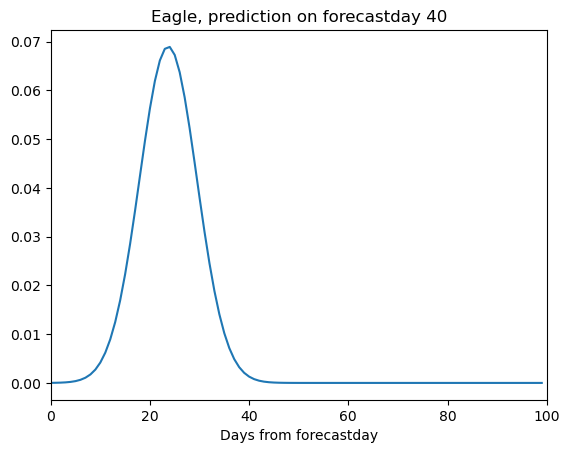

5.78129607869729


/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

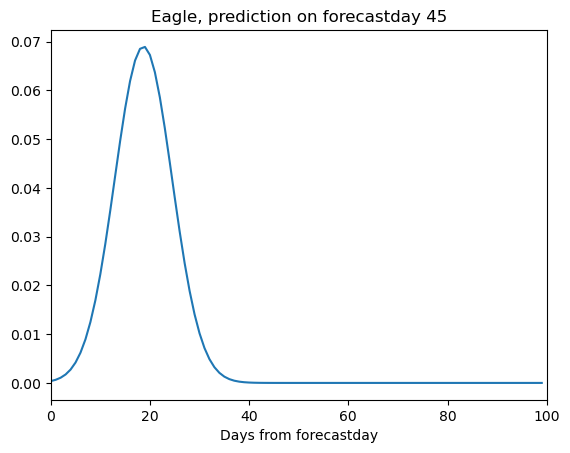

/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

5.78129607869729


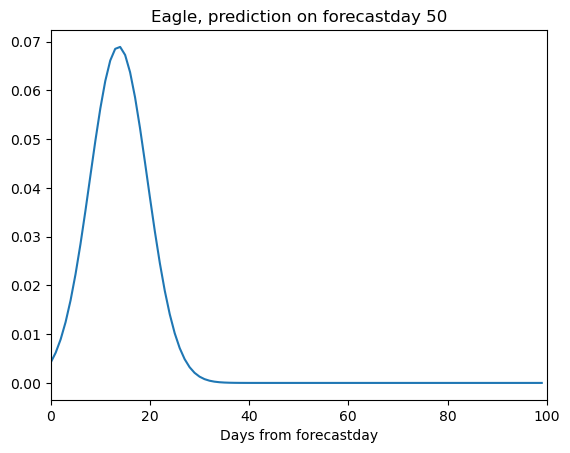

/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

5.78129607869729


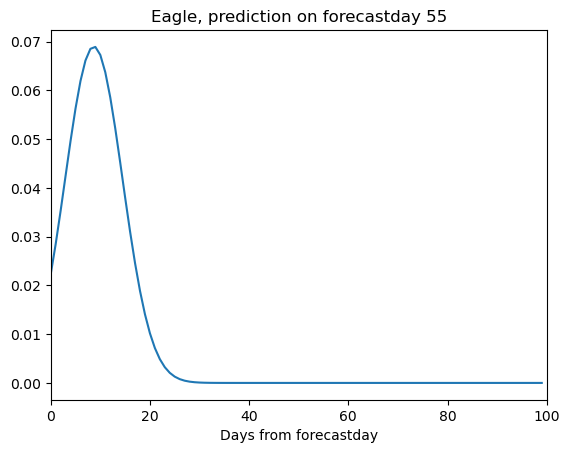

/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/chris/mambaforge/envs/fiweps/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature nam

5.78129607869729


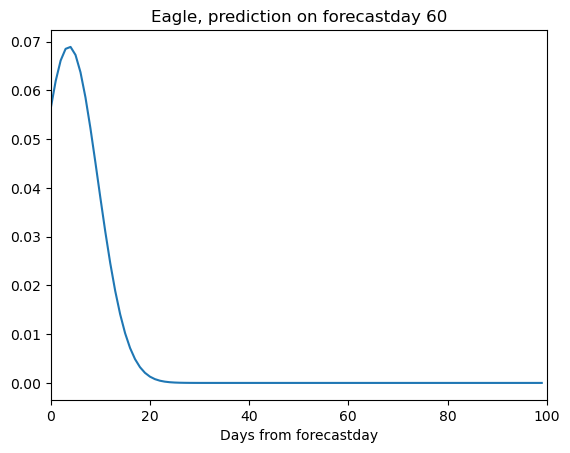

In [ ]:
for ii in range (40, 65, 5):
    breakup_avg_model = linear_model.LinearRegression() 
    DF = likelihoodDF[likelihoodDF.forecast_day_past_march1==ii].copy()
    breakup_avg_model.fit(DF[['year']], DF[['days_from_then']])
    mu_0 = breakup_avg_model.predict([[2023]]).item()
    sigma_0 = mean_squared_error([breakup_avg_model.predict([[yr]]).item() for yr in DF['year'].astype(int).tolist()],
                   DF['days_from_then'].tolist(), squared=False)
    print(sigma_0)
    plt.plot(xs, stats.norm.pdf(xs, mu_0, sigma_0))
    plt.title(f"Eagle, prediction on forecastday {ii}")
    plt.xlabel("Days from forecastday")
    plt.xlim((0, 100))
    plt.show()

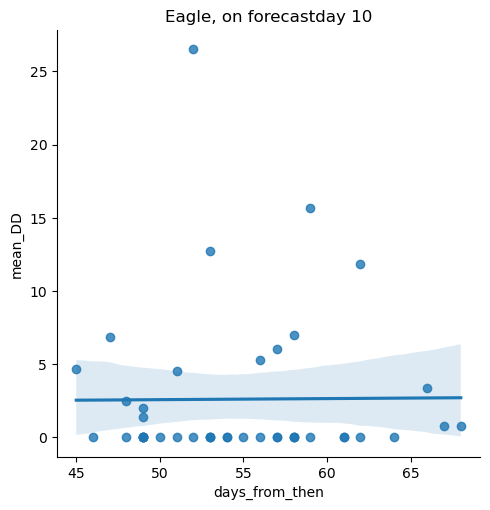

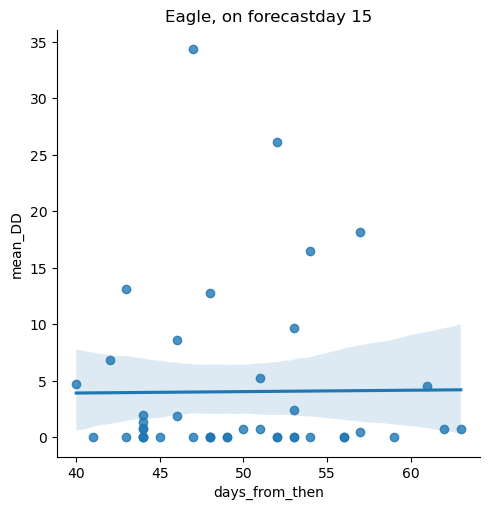

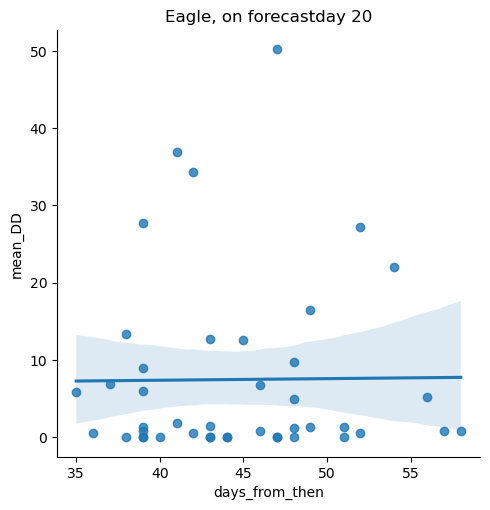

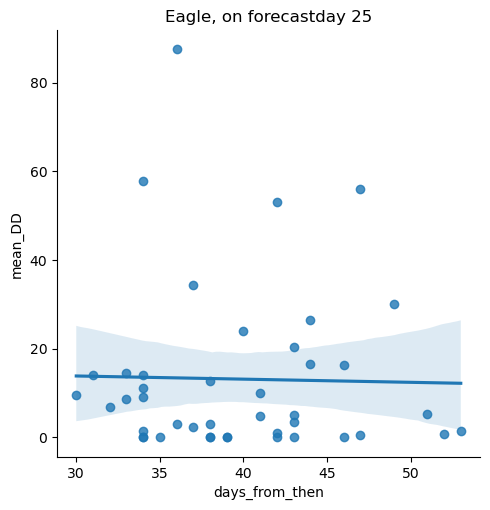

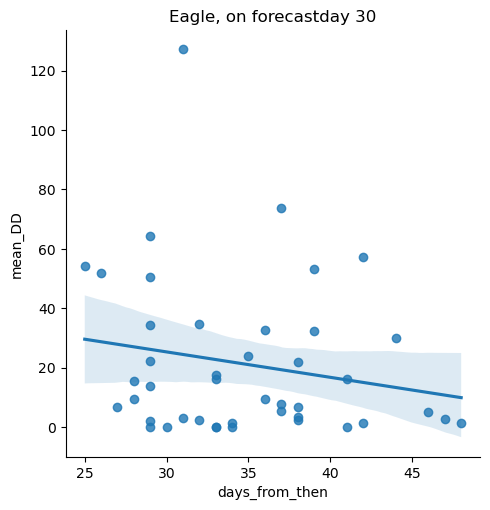

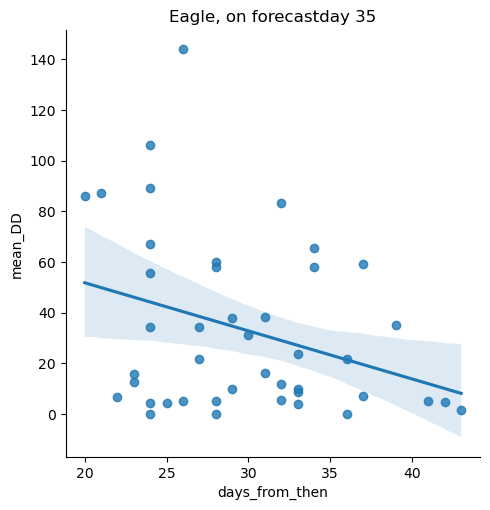

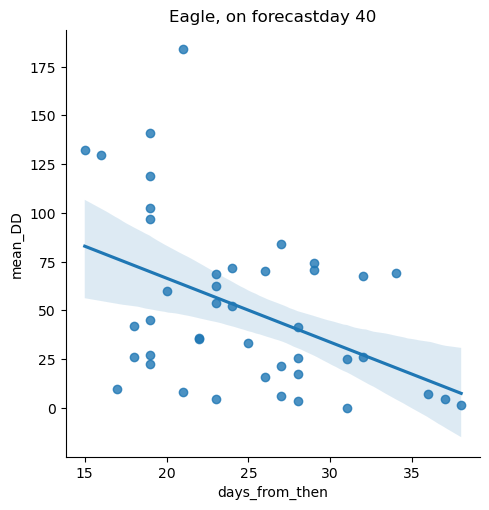

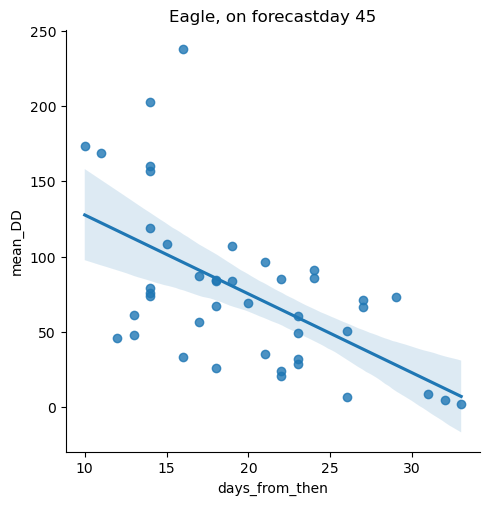

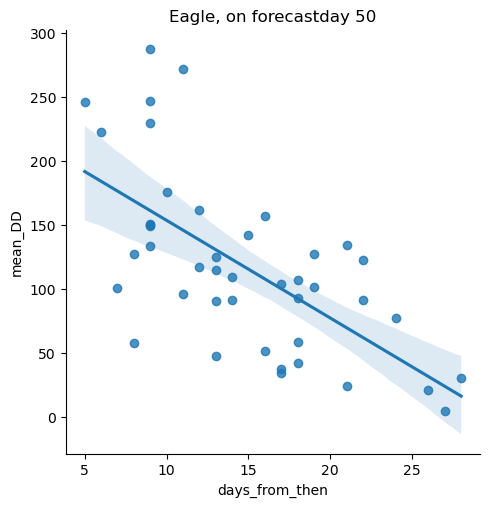

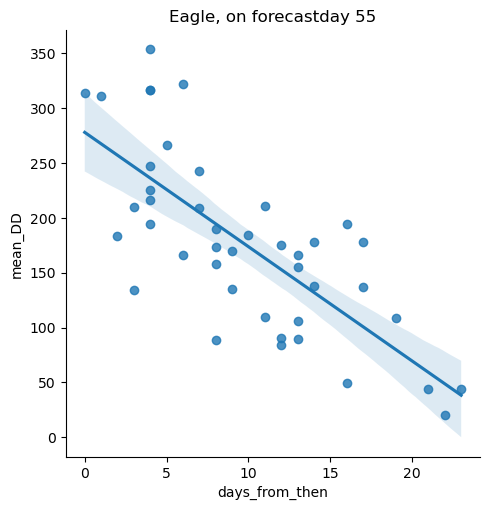

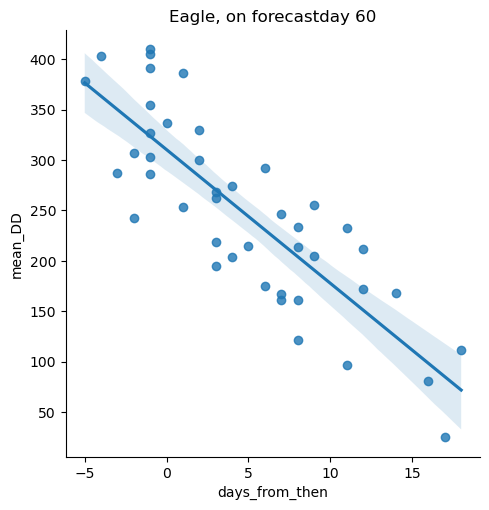

In [ ]:
# pivoted = likelihoodDF.pivot(index='forecast_day_past_march1', columns='days_from_then', values='mean_DD')
for ii in range (10, 65, 5):
    sns.lmplot(data=likelihoodDF[likelihoodDF.forecast_day_past_march1==ii], x='days_from_then', y='mean_DD')
    plt.title(f"Eagle, on forecastday {ii}")

Text(41.31482827771349, 0.5, 'Breakup in ... days')

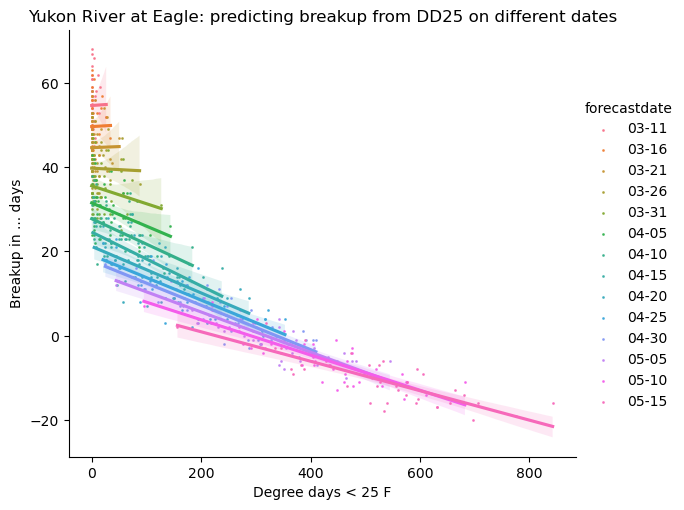

In [ ]:
sns.lmplot(data=likelihoodDF[likelihoodDF.forecast_day_past_march1 % 5 == 0], 
           hue='forecastdate', y='days_from_then', x='mean_DD', 
           scatter=True, scatter_kws={"s": 1},
           aspect=1.2,
           )
plt.title(f"Yukon River at Eagle: predicting breakup from {prefix} on different dates")
plt.xlabel('Degree days < 25 F')
plt.ylabel("Breakup in ... days")

In [ ]:
possible_days = sorted(list(set(breakup['days_since_march1'])))
records = []

for days in possible_days:
    days_possible = days + days_after_march_1
    years = breakup[breakup['days_since_march1']==days].year.astype(str).to_list()
    if years != []:
        records.append(
            {'days_after_march_1': days_after_march_1,
                'days_from_then': days,
                'mean_DD': mean_eagle[years].mean(axis=1)[days_after_march_1]}
        )

In [ ]:
mean_eagle[['2014', '2019']].mean(axis=1)[0]

0.0

<AxesSubplot: xlabel='d_since_march1'>

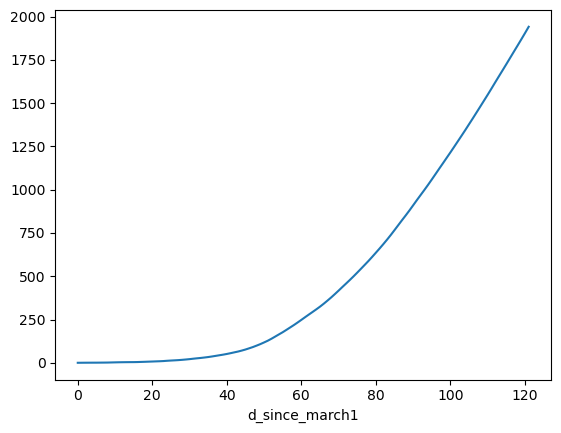

In [ ]:
mean_eagle.mean(axis=1).plot()

<AxesSubplot: xlabel='d_since_march1'>

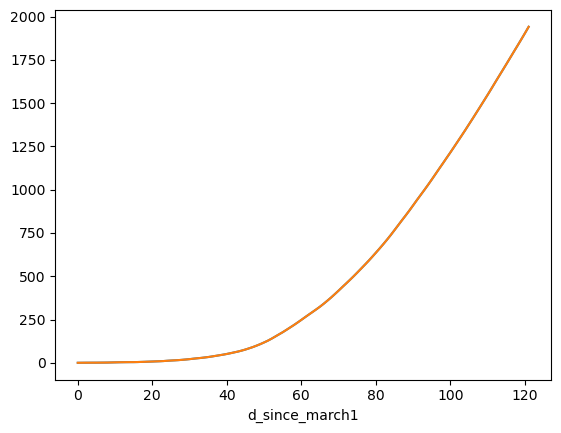

In [ ]:
mean_eagle1 = pd.concat(stationsdfs.values())
mean_eagle1 = mean_eagle1.groupby(mean_eagle1.index).mean()
ax = mean_eagle1.mean(axis=1).plot()
mean_eagle.mean(axis=1).plot(ax=ax)

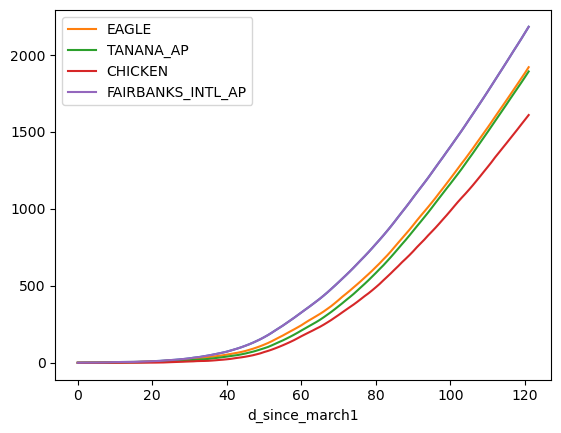

In [ ]:
ax = stationsdfs['FAIRBANKS_INTL_AP'].mean(axis=1).plot()
for key in stationsdfs.keys():
    stationsdfs[key].mean(axis=1).plot(ax=ax, label=key)
plt.legend()

## Make a combined dataset for stationdata

In [ ]:
sites = ['FAIRBANKS_INTL_AP', 'EAGLE', 'BIG_DELTA_AIRPORT', 'NENANA_MUN_AP']

In [ ]:
stationsdfs = {}
stationfolder = Path("/Users/christine/Projects/2023_Riverice/data/weatherstations/ACIS/TDD/tdd_cumul_bystation")
for station in sites2:
    stationsdfs[station] = pd.read_csv(stationfolder / f"{station}_yearly_TDD_cumul.csv", skiprows=4, index_col=0)